In [1]:
#Importing Needed Packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd
import cufflinks as cf
import yfinance as yf
cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()
%matplotlib inline

In [2]:
#Reading database file as weather_df and making date_time column as index of dataframe
weather_df = pd.read_excel('TataData.xlsx', parse_dates=['Datetime'], index_col='Datetime')
weather_df.head(5)

Batterie (V)  Rayonnement global (j/cm²)  Température (°C)  \
Datetime                                                                 
2012-06-22          6.76                     2728.52             35.10   
2012-06-23          6.76                     1778.98             35.54   
2012-06-24          6.73                     1402.39             34.72   
2012-06-25          6.76                     1907.94             36.30   
2012-06-26          6.76                     2204.78             37.07   

            ETo (mm)  Humidité relative (%)  Précipitation (mm)  \
Datetime                                                          
2012-06-22      7.43                  13.16                 0.0   
2012-06-23      6.64                  12.12                 0.0   
2012-06-24      6.21                  16.95                 0.0   
2012-06-25      6.36                  13.10                 0.0   
2012-06-26      7.34                  13.08                 0.2   

            Vitesse du vent (km/h)  Direction du vent (°)  tempmax  tempmin  \
Datetime                                                                      
2012-06-22                   12.88                 166.57     41.8     23.7   
2012-06-23                   24.33                 125.53     43.9     26.7   
2012-06-24                   18.74                 153.65     40.0     25.8   
2012-06-25                   18.84                 154.63     43.4     29.1   
2012-06-26                   18.36                 181.03     42.3     28.2   

            ...  precip  precipprob  precipcover  windspeed  winddir  \
Datetime    ...                                                        
2012-06-22  ...     0.0           0          0.0       30.6    253.5   
2012-06-23  ...     0.0           0          0.0       25.6    128.5   
2012-06-24  ...     0.0           0          0.0       19.8    122.7   
2012-06-25  ...     0.0           0          0.0       24.1    136.4   
2012-06-26  ...     0.0           0          0.0       24.5    118.8   

            cloudcover  solarradiation  solarenergy  uvindex        conditions  
Datetime                                                                        
2012-06-22         0.0           360.4         31.1       10             Clear  
2012-06-23         4.8           321.3         27.7       10             Clear  
2012-06-24        46.6           234.4         20.2        8  Partially cloudy  
2012-06-25        60.8           290.6         25.2       10  Partially cloudy  
2012-06-26        68.9           229.4         19.9        7  Partially cloudy  

[5 rows x 26 columns]

In [3]:
weather_df.describe()

Batterie (V)  Rayonnement global (j/cm²)  Température (°C)  \
count   3645.000000                 2890.000000       3645.000000   
mean       6.872137                 2012.106471         24.747292   
std        0.125527                  634.179410          8.347116   
min        6.440000                    0.000000          7.300000   
25%        6.790000                 1482.915000         17.310000   
50%        6.860000                 2017.585000         24.460000   
75%        6.960000                 2564.585000         32.250000   
max        7.160000                 3162.170000         41.900000   

          ETo (mm)  Humidité relative (%)  Précipitation (mm)  \
count  3645.000000            3645.000000         3645.000000   
mean      4.700938              12.504310            0.221838   
std       2.451765               8.537735            2.374180   
min       0.000000               1.840000            0.000000   
25%       2.700000               6.630000            0.000000   
50%       4.390000              10.230000            0.000000   
75%       6.570000              15.820000            0.000000   
max      12.140000              82.780000           84.800000   

       Vitesse du vent (km/h)  Direction du vent (°)      tempmax  \
count             3645.000000            2890.000000  3653.000000   
mean                14.061619             175.754765    31.285847   
std                  5.575256              44.996052     8.699604   
min                  3.670000              59.990000     6.900000   
25%                  9.710000             141.210000    23.800000   
50%                 13.390000             172.345000    31.100000   
75%                 17.780000             211.145000    39.200000   
max                 39.080000             274.150000    46.900000   

           tempmin  ...     humidity       precip   precipprob  precipcover  \
count  3653.000000  ...  3653.000000  3653.000000  3653.000000  3653.000000   
mean     16.291185  ...    31.356118     0.325185     9.690665     3.036340   
std       7.715334  ...    14.532989     2.474187    29.587111    12.445926   
min      -1.500000  ...     7.100000     0.000000     0.000000     0.000000   
25%       9.500000  ...    19.800000     0.000000     0.000000     0.000000   
50%      15.800000  ...    29.100000     0.000000     0.000000     0.000000   
75%      22.700000  ...    40.100000     0.000000     0.000000     0.000000   
max      33.400000  ...    87.700000    55.400000   100.000000   100.000000   

         windspeed      winddir   cloudcover  solarradiation  solarenergy  \
count  3653.000000  3653.000000  3653.000000     3653.000000  3653.000000   
mean     25.859923   200.833014    23.397126      260.107446    22.458719   
std       8.294462    87.130450    26.764574       73.651711     6.346451   
min       7.200000    27.100000     0.000000       51.200000     4.400000   
25%      19.400000   124.100000     0.800000      193.600000    16.700000   
50%      25.900000   198.400000    12.300000      265.200000    22.900000   
75%      31.700000   286.400000    39.600000      325.900000    28.200000   
max      58.700000   343.500000    97.700000      392.700000    32.900000   

           uvindex  
count  3653.000000  
mean      8.554065  
std       1.566924  
min       2.000000  
25%       7.000000  
50%       9.000000  
75%      10.000000  
max      10.000000  

[8 rows x 25 columns]

In [4]:
MissingValues = weather_df.isnull()
Sum=MissingValues.sum()
Sum

Batterie (V)                    8
Rayonnement global (j/cm²)    763
Température (°C)                8
ETo (mm)                        8
Humidité relative (%)           8
Précipitation (mm)              8
Vitesse du vent (km/h)          8
Direction du vent (°)         763
tempmax                         0
tempmin                         0
temp                            0
feelslikemax                    0
feelslikemin                    0
feelslike                       0
dew                             0
humidity                        0
precip                          0
precipprob                      0
precipcover                     0
windspeed                       0
winddir                         0
cloudcover                      0
solarradiation                  0
solarenergy                     0
uvindex                         0
conditions                      0
dtype: int64

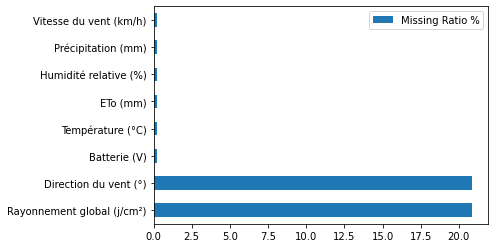

In [5]:
df=weather_df
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [6]:
weather_df['Batterie (V)'].fillna(value=6.872137, inplace=True)
weather_df['Rayonnement global (j/cm²)'].fillna(value=2012.106471, inplace=True)
weather_df['Température (°C)'].fillna(value=24.747292, inplace=True)
weather_df['ETo (mm)'].fillna(value=4.700938, inplace=True)
weather_df['Humidité relative (%)'].fillna(value=12.504310, inplace=True)
weather_df['Précipitation (mm)'].fillna(value=0.221838, inplace=True)
weather_df['Vitesse du vent (km/h)'].fillna(value=14.061619, inplace=True)
weather_df['Direction du vent (°)'].fillna(value=175.754765, inplace=True)

In [7]:
df=weather_df
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

No NAs found


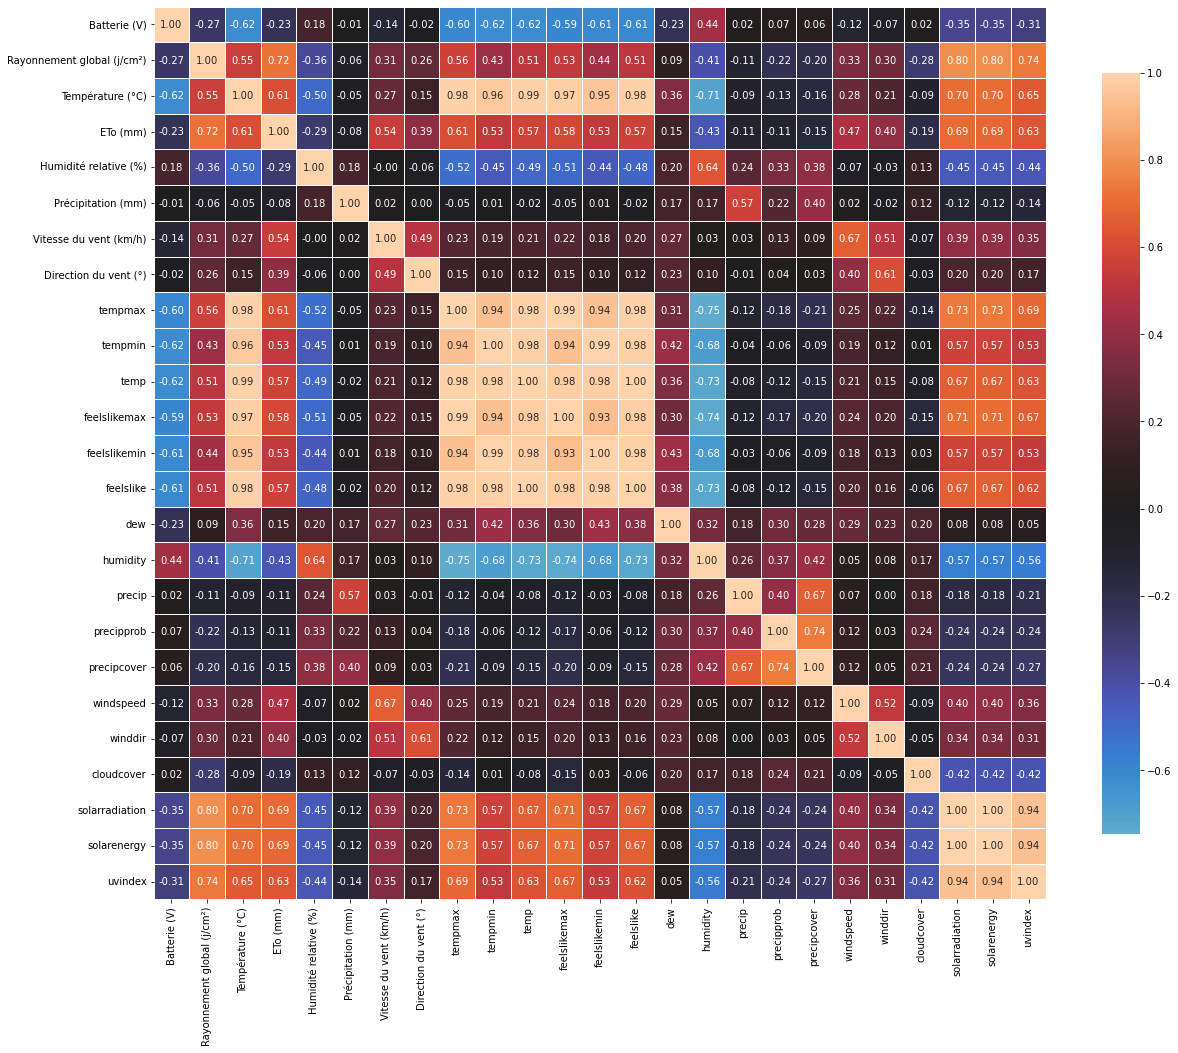

In [8]:
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(weather_df)

In [9]:
weather_df_num=weather_df.loc[:,['Rayonnement global (j/cm²)','tempmax','solarradiation','solarenergy','uvindex','humidity']]


In [10]:
weather_df_num.head()

Rayonnement global (j/cm²)  tempmax  solarradiation  solarenergy  \
Datetime                                                                       
2012-06-22                     2728.52     41.8           360.4         31.1   
2012-06-23                     1778.98     43.9           321.3         27.7   
2012-06-24                     1402.39     40.0           234.4         20.2   
2012-06-25                     1907.94     43.4           290.6         25.2   
2012-06-26                     2204.78     42.3           229.4         19.9   

            uvindex  humidity  
Datetime                       
2012-06-22       10      15.1  
2012-06-23       10      11.2  
2012-06-24        8      14.6  
2012-06-25       10      14.6  
2012-06-26        7      15.5

In [11]:
#on va tester les 4 modules
#1- Multiple Linear Regression
#2- Decision Tree Regression
#3- Random Forest Regression
#4- Polynomail Regression

In [12]:
weather_y=weather_df_num.pop("Rayonnement global (j/cm²)")
weather_x=weather_df_num
weather_y

Datetime
2012-06-22    2728.52
2012-06-23    1778.98
2012-06-24    1402.39
2012-06-25    1907.94
2012-06-26    2204.78
               ...   
2022-06-18    2622.14
2022-06-19    2551.95
2022-06-20    1960.72
2022-06-21    1964.13
2022-06-22    2211.28
Name: Rayonnement global (j/cm²), Length: 3653, dtype: float64

In [13]:
#Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.1,random_state=4)

In [14]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [15]:
prediction = model.predict(test_X)

In [16]:
#calculating error
np.mean(np.absolute(prediction-test_y))

239.01813256955492

In [18]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 239.02
R2-score: 0.69


In [19]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

Actual  Prediction         diff
Datetime                                        
2020-02-22  1878.750000     1826.03    52.720000
2021-06-02  2589.320000     2514.60    74.720000
2013-05-19  3061.550000     2756.24   305.310000
2015-11-23  2012.106471     1600.64   411.466471
2013-08-05  2763.780000     2517.43   246.350000
...                 ...         ...          ...
2018-09-11   487.140000     1694.55 -1207.410000
2018-05-03  2667.400000     2643.02    24.380000
2015-02-26  2012.106471     1933.17    78.936471
2019-04-08  2815.340000     2439.49   375.850000
2015-07-07  2012.106471     2531.68  -519.573529

[366 rows x 3 columns]

<AxesSubplot:xlabel='Datetime'>

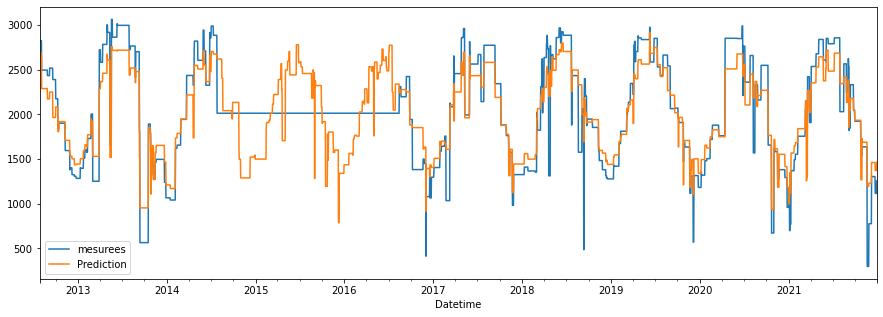

In [30]:
pd.DataFrame({'mesurees':test_y,'Prediction':prediction})['2012':'2021'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [83]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Multiple Linear Regression ',subplots=False)

In [32]:
#Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [34]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

259.91304082513665

In [35]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.49


In [36]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 259.91
R2-score: 0.49


In [37]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Mesuree':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

Mesuree  Prediction         diff
Datetime                                        
2020-02-22  1878.750000     2217.81  -339.060000
2021-06-02  2589.320000     3066.89  -477.570000
2013-05-19  3061.550000     2451.25   610.300000
2015-11-23  2012.106471     1466.87   545.236471
2013-08-05  2763.780000     2012.11   751.670000
...                 ...         ...          ...
2018-09-11   487.140000     1794.06 -1306.920000
2018-05-03  2667.400000     2918.96  -251.560000
2015-02-26  2012.106471     2012.11    -0.003529
2019-04-08  2815.340000     2710.46   104.880000
2015-07-07  2012.106471     2012.11    -0.003529

[366 rows x 3 columns]

<AxesSubplot:xlabel='Datetime'>

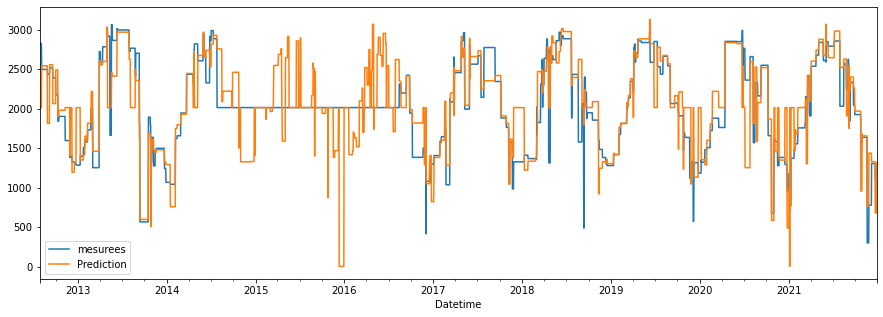

In [38]:
pd.DataFrame({'mesurees':test_y,'Prediction':prediction2})['2012':'2021'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [41]:
pd.DataFrame({'mesurees':test_y,'Prediction':prediction2})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Decision Tree Regression',subplots=False)

In [42]:
#Random Forest Regression

In [55]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=300,random_state=0,n_estimators=700)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=300, n_estimators=700, random_state=0)

In [56]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

232.4786924120336

In [57]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.68


In [58]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 232.48
R2-score: 0.68


In [59]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

Actual  Prediction         diff
Datetime                                        
2020-02-22  1878.750000     1955.57   -76.820000
2021-06-02  2589.320000     2463.95   125.370000
2013-05-19  3061.550000     2655.71   405.840000
2015-11-23  2012.106471     1593.92   418.186471
2013-08-05  2763.780000     2379.34   384.440000
...                 ...         ...          ...
2018-09-11   487.140000     1734.71 -1247.570000
2018-05-03  2667.400000     2689.03   -21.630000
2015-02-26  2012.106471     1986.51    25.596471
2019-04-08  2815.340000     2461.54   353.800000
2015-07-07  2012.106471     2382.72  -370.613529

[366 rows x 3 columns]

<AxesSubplot:xlabel='Datetime'>

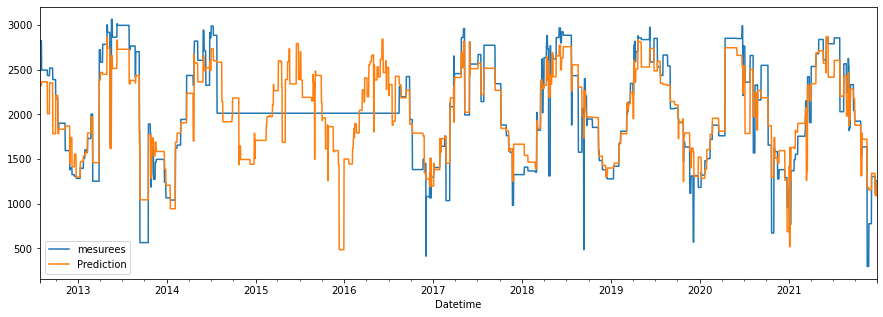

In [61]:
pd.DataFrame({'mesurees':test_y,'Prediction':prediction3})['2010':'2021'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [63]:
pd.DataFrame({'mesurees':test_y,'Prediction':prediction3})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Random Forest Regression',subplots=False)

In [64]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
poly_regr = PolynomialFeatures(degree = 3) # our polynomial model is of order
X_poly = poly_regr.fit_transform(train_X) # transforms the features to the polynomial form
polyReg = LinearRegression() # creates a linear regression object
polyReg.fit(X_poly, train_y) # fits the linear regression object to the polynomial features



LinearRegression()

In [65]:
prediction4=polyReg.predict(poly_regr.fit_transform(test_X))

In [66]:
for i in range(len(prediction4)):
  prediction4[i]=round(prediction4[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction4,'diff':(test_y-prediction4)})

Actual  Prediction         diff
Datetime                                        
2020-02-22  1878.750000     1958.84   -80.090000
2021-06-02  2589.320000     2520.05    69.270000
2013-05-19  3061.550000     3086.69   -25.140000
2015-11-23  2012.106471     1399.19   612.916471
2013-08-05  2763.780000     2438.30   325.480000
...                 ...         ...          ...
2018-09-11   487.140000     1761.91 -1274.770000
2018-05-03  2667.400000     2650.08    17.320000
2015-02-26  2012.106471     1961.78    50.326471
2019-04-08  2815.340000     2411.94   403.400000
2015-07-07  2012.106471     2384.93  -372.823529

[366 rows x 3 columns]

In [67]:
np.mean(np.absolute(prediction4-test_y))

283.0327434672134

In [68]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction4 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction4 ) )

Mean absolute error: 283.03
R2-score: 0.48


<AxesSubplot:xlabel='Datetime'>

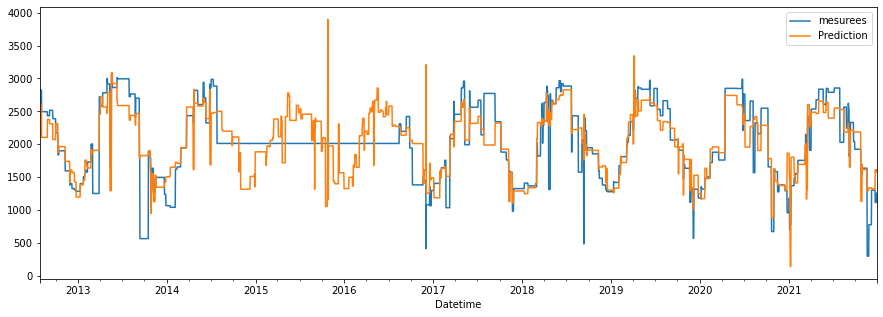

In [69]:
pd.DataFrame({'mesurees':test_y,'Prediction':prediction4})['2010':'2021'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [70]:
pd.DataFrame({'mesurees':test_y,'Prediction':prediction4})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Decision Tree Regression',subplots=False)

In [81]:
#Comparaison des 4 Model

In [82]:
pd.DataFrame({'Valeur réelle':test_y,'MLR Model':prediction,'DTR Model':prediction2,'RFR Model':prediction3,'PR Model':prediction4})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Comparaison des predictions des modeles avec la valeur reelle mesuree ',subplots=False)

In [72]:
import requests
import json
response_API = requests.get('https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/tata%20maroc?unitGroup=metric&key=VSJTPURWV477GP6K5L8ZX8UWN&contentType=json')
df=response_API.json()
data=df['days']
data

[{'datetime': '2022-06-25',
  'datetimeEpoch': 1656111600,
  'tempmax': 37.2,
  'tempmin': 25.0,
  'temp': 31.0,
  'feelslikemax': 34.4,
  'feelslikemin': 25.0,
  'feelslike': 29.6,
  'dew': 6.9,
  'humidity': 23.4,
  'precip': 0.0,
  'precipprob': 0.0,
  'precipcover': 0.0,
  'preciptype': None,
  'snow': 0.0,
  'snowdepth': 0.0,
  'windgust': 26.6,
  'windspeed': 16.9,
  'winddir': 257.1,
  'pressure': 1007.0,
  'cloudcover': 0.0,
  'visibility': 24.1,
  'solarradiation': 371.5,
  'solarenergy': 32.1,
  'uvindex': 10.0,
  'severerisk': 10.0,
  'sunrise': '06:33:02',
  'sunriseEpoch': 1656135182,
  'sunset': '20:36:06',
  'sunsetEpoch': 1656185766,
  'moonphase': 0.95,
  'conditions': 'Clear',
  'description': 'Clear conditions throughout the day.',
  'icon': 'clear-day',
  'stations': ['remote'],
  'source': 'comb',
  'hours': [{'datetime': '00:00:00',
    'datetimeEpoch': 1656111600,
    'temp': 28.5,
    'feelslike': 27.2,
    'humidity': 24.7,
    'dew': 6.4,
    'precip': 0.0,
  

In [74]:
datetime=np.array([])
tempmax=np.array([])
solarradiation=np.array([])
solarenergy=np.array([])
uvindex=np.array([])
humidity=np.array([])
#'Rayonnement global (j/cm²)','tempmax','solarradiation','solarenergy','uvindex','humidity'
for i in range(len(data)):
    datetime=np.append(datetime, data[i]['datetime'])
    solarradiation=np.append(solarradiation, data[i]['solarradiation'])
    solarenergy=np.append(solarenergy, data[i]['solarenergy'])
    uvindex=np.append(uvindex, data[i]['uvindex'])
    tempmax=np.append(tempmax, data[i]['tempmax'])
    humidity=np.append(humidity, data[i]['humidity'])

In [75]:
xc=pd.DataFrame({'datetime':datetime,'tempmax':tempmax,'solarradiation':solarradiation,'solarenergy':solarenergy,'uvindex':uvindex,'humidity':humidity})

In [76]:
xc.set_index(['datetime'],inplace = True)
xc

tempmax  solarradiation  solarenergy  uvindex  humidity
datetime                                                           
2022-06-25     37.2           371.5         32.1     10.0      23.4
2022-06-26     37.5           367.9         31.8     10.0      27.0
2022-06-27     38.3           365.9         31.8     10.0      28.2
2022-06-28     38.7           366.8         31.8     10.0      28.7
2022-06-29     39.2           384.2         33.0     10.0      28.3
2022-06-30     36.9           361.7         31.1     10.0      26.9
2022-07-01     34.4           368.2         32.2     10.0      29.2
2022-07-02     36.6           373.0         32.2     10.0      24.4
2022-07-03     38.5           367.2         31.8     10.0      14.5
2022-07-04     41.4           363.5         31.4     10.0      13.1
2022-07-05     42.8           363.3         31.4     10.0      10.9
2022-07-06     42.8           353.5         30.6     10.0      11.4
2022-07-07     42.5           312.3         27.1      9.0      11.6
2022-07-08     41.4           365.6         31.5     10.0      12.5
2022-07-09     41.7           365.0         31.7     10.0      10.8

In [77]:
prediction11 = model.predict(xc)
prediction22=regressor.predict(xc)
prediction33=regr.predict(xc)
prediction44=polyReg.predict(poly_regr.fit_transform(xc))

In [79]:
for i in range(len(prediction11)):
  prediction11[i]=round(prediction11[i],2)

for i in range(len(prediction22)):
  prediction22[i]=round(prediction22[i],2)

for i in range(len(prediction33)):
  prediction33[i]=round(prediction33[i],2)

for i in range(len(prediction44)):
  prediction44[i]=round(prediction44[i],2)

Predictions=pd.DataFrame({'datetime':datetime,'API VisualCrossing':solarradiation,'MLR Model':prediction11,'DTR Model':prediction22,'RFR Model':prediction33,'PR Model':prediction44})
Predictions.set_index(['datetime'],inplace = True)
Predictions

API VisualCrossing  MLR Model  DTR Model  RFR Model  PR Model
datetime                                                                 
2022-06-25               371.5    2740.60    2989.76    2481.35   2806.53
2022-06-26               367.9    2724.96    3036.16    2817.42   2731.19
2022-06-27               365.9    2713.63    2880.87    2690.76   2809.02
2022-06-28               366.8    2721.99    2873.70    2660.17   2746.50
2022-06-29               384.2    2848.25    2915.49    2675.87   2741.68
2022-06-30               361.7    2680.00    3021.13    2659.68   2561.18
2022-07-01               368.2    2731.31    3034.26    2816.82   2958.67
2022-07-02               373.0    2754.28    2989.76    2817.94   2805.92
2022-07-03               367.2    2683.81    2912.53    2698.60   2976.70
2022-07-04               363.5    2654.10    2835.05    2818.56   2699.25
2022-07-05               363.3    2646.68    2764.94    2631.44   2640.99
2022-07-06               353.5    2576.85    2786.16    2700.46   2511.55
2022-07-07               312.3    2319.42    2340.10    2253.14   2224.81
2022-07-08               365.6    2667.86    2835.05    2750.49   2722.00
2022-07-09               365.0    2657.88    2012.11    2593.77   2780.84

In [80]:
Predictions.fillna(method='pad').iplot(title='Comparaison des predictions',subplots=False)